### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [40]:
data = pd.read_csv('data/coupons.csv')

In [43]:
data.sample(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3284,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,31,Married partner,...,less1,1~3,gt8,less1,1,1,0,0,1,1
1322,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1~3,4~8,never,1,0,0,1,0,0
6344,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,0,0,1,0,0
7406,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,1,0,1
9681,Work,Alone,Sunny,80,7AM,Coffee House,1d,Male,21,Single,...,never,4~8,1~3,1~3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Male,41,Married partner,...,4~8,4~8,1~3,less1,1,1,0,0,1,1
6225,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,41,Married partner,...,less1,1~3,1~3,less1,1,0,0,1,0,0
12400,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,0
1750,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Female,26,Single,...,1~3,less1,1~3,less1,1,1,0,0,1,1


In [42]:
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [44]:
data.info()
print("Given "+ str(data.shape))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [45]:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in column 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in column 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in column 'temperature': [55 80 30]
Unique values in column 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in column 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in column 'expiration': ['1d' '2h']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in column 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in column 'has_children': [1 0]
Unique values in column 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in colu


** Notes **
1. Car column has Nan, but once inspected it looks like its all valid data and just that not filled in for most rows
2. Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 has nan, those can be removed as part of cleanup
3. There are few duplicate rows those also can be removed
4. Car column with "do not drive" and "Car that is too old to install Onstar", can be removed

3. Decide what to do about your missing data -- drop, replace, other...

Starting data len 12610


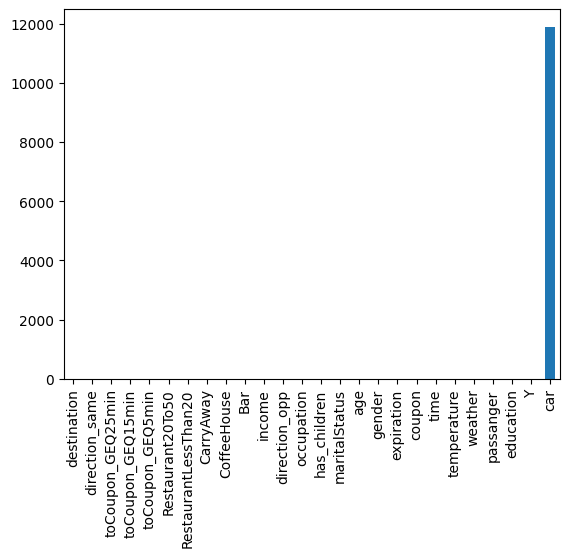

Ending data len after cleanup 12610


In [ ]:
print("Starting data len " + str(len(data)))
data = data.drop_duplicates()

dn_data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']) 
dn_data = dn_data[dn_data['car'] != 'do not drive']
dn_data = dn_data[dn_data['car'] != 'Car that is too old to install Onstar :D']

print( "Ending data len after cleanup " + str(len(data)))
# These creates a bar plot of missing data
dn_data.isnull().sum().sort_values().plot(kind = 'bar')
plt.savefig('data/missing_info.png')
plt.show()


##
1. Car has lot of nan, but it seems its all valid data. Replacing with Drive.

In [58]:
dn_data = dn_data.fillna({'car': 'Drive'})
for col in data.columns:
    unique_values = dn_data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in column 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in column 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in column 'temperature': [55 80 30]
Unique values in column 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in column 'coupon': ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
Unique values in column 'expiration': ['1d' '2h']
Unique values in column 'gender': ['Male' 'Female']
Unique values in column 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in column 'maritalStatus': ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
Unique values in column 'has_children': [0 1]
Unique values in column 'education': ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in colu

4. What proportion of the total observations chose to accept the coupon?



In [59]:
proportion = dn_data['Y'].value_counts(normalize=True) * 100
# Y == 1, as accepted coupon
print(proportion[1])


56.82046138415245


5. Use a bar plot to visualize the `coupon` column.

                  coupon  Y  count
0                    Bar  0   1119
1                    Bar  1    783
2  Carry out & Take away  1   1636
3  Carry out & Take away  0    589
4           Coffee House  0   1912
5           Coffee House  1   1884
6      Restaurant(20-50)  0    781
7      Restaurant(20-50)  1    624
8        Restaurant(<20)  1   1871
9        Restaurant(<20)  0    765


<Axes: title={'center': 'Coupon distribution'}, xlabel='coupon'>

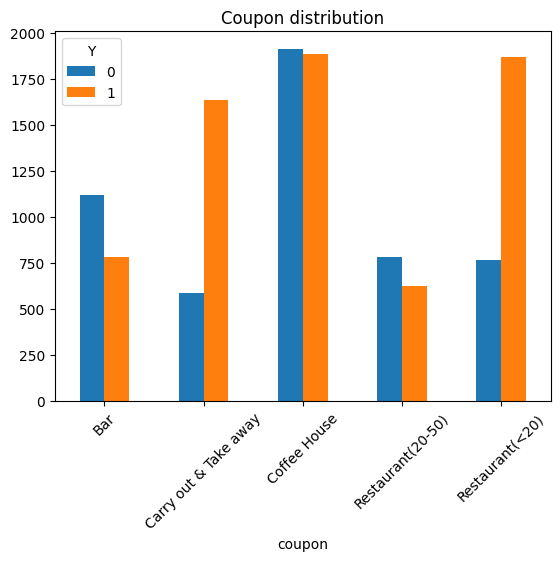

In [61]:

#The below plotsthe coupon column againsts the the accepted/not accepted counts
y = dn_data.groupby('coupon').Y.value_counts().reset_index()
print(y)
y.pivot_table(index = 'coupon', columns='Y').plot(kind='bar', y='count', title='Coupon distribution', rot=45)

6. Use a histogram to visualize the temperature column.

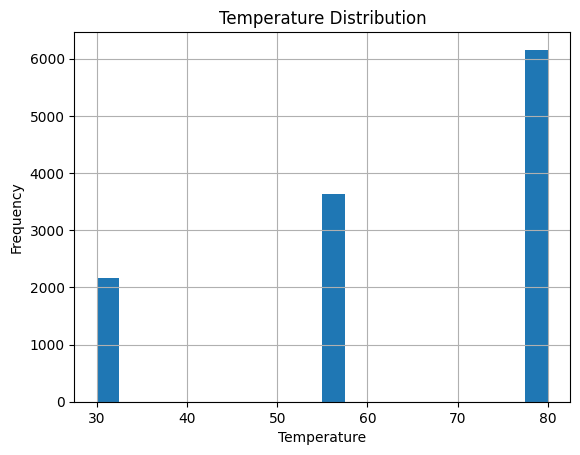

In [ ]:
dn_data['temperature'].hist(bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

   temperature  Y  count
0           30  1   1220
1           30  0   1080
2           55  1   2037
3           55  0   1761
4           80  1   3891
5           80  0   2587
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='temperature'>

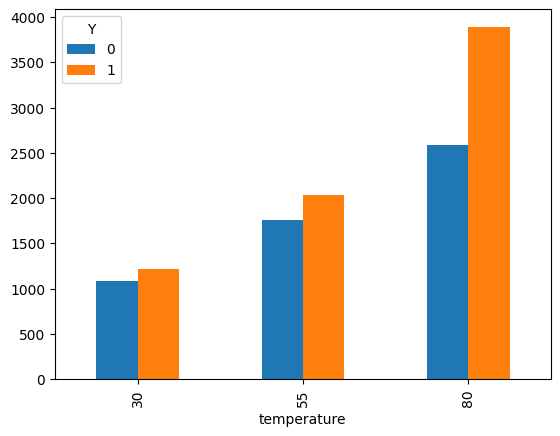

In [9]:
y = dn_data.groupby('temperature').Y.value_counts().reset_index()
print(y)
print(type(y))

y.pivot_table(index = 'temperature', columns='Y').plot(kind='bar', y='count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
bar_df = dn_data[dn_data["coupon"] == 'Bar']
print(len(bar_df))
bar_df.head()

2004


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [ ]:
proportion = bar_df['Y'].value_counts(normalize=True) * 100
# Y == 1, as accepted coupon
print(proportion[1])

Y
0    58.882236
1    41.117764
Name: proportion, dtype: float64
41.11776447105788


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


   Y  count    Frequency
0  1   5955   3 or fewer
1  0   4656   3 or fewer
0  1    176  more than 3
1  0    128  more than 3


(array([0, 1]), [Text(0, 0, '3 or fewer'), Text(1, 0, 'more than 3')])

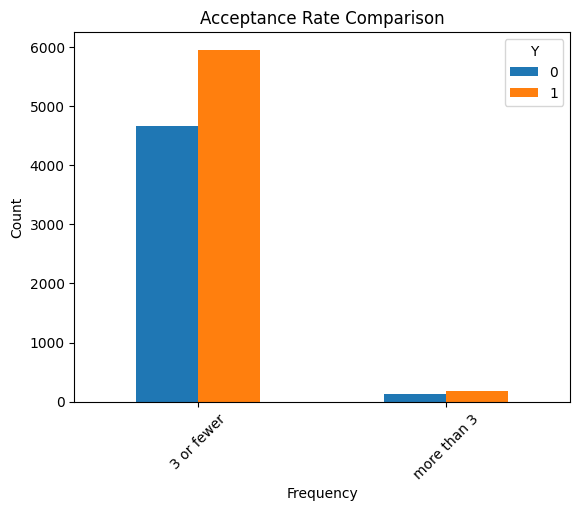

In [77]:
#['never' 'less1' '1~3' 'gt8' '4~8']
list1 = ['1~3', 'never', 'less1']
df1 = dn_data.query("`Bar` in @list1")
df_3_or_fewer = df1['Y'].value_counts().reset_index()
df_3_or_fewer['Frequency'] = '3 or fewer' 


list2 = ['4-8', 'gt8']
df2 = dn_data.query("`Bar` in @list2")
df_more_than_3 = df2['Y'].value_counts().reset_index() 
df_more_than_3['Frequency'] = 'more than 3' 

data = pd.concat([df_3_or_fewer, df_more_than_3], axis=0)

print(data)
data.pivot_table(index = 'Frequency', columns='Y').plot(kind='bar', y='count')
plt.title('Acceptance Rate Comparison')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45) 



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


   Y  count    Agegroup
0  1   1161  25 or more
1  0    715  25 or more
0  1   1158       Other
1  0    684       Other


(array([0, 1]), [Text(0, 0, '25 or more'), Text(1, 0, 'Other')])

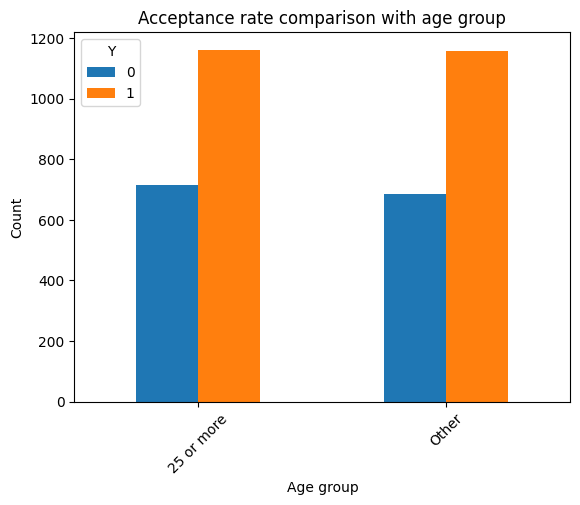

In [89]:

bar_df_cleaned = dn_data

#print(bar_df_cleaned['Bar'].unique())
#['never' 'less1' '1~3' 'gt8' '4~8']
list1 = ['never', 'less1']
#list of ppl hwo went to bar more than once a month
df1 = bar_df_cleaned.query("`Bar` not in @list1")

#print(bar_df['age'].unique())
#['21' '46' '26' '31' '41' '50plus' '36' 'below21']a
list25 = ['26', '31', '41', '50plus' '36']
age_25_or_more = df1.query("`age` in @list25")
age_25_or_more = age_25_or_more['Y'].value_counts().reset_index()
age_25_or_more['Agegroup'] = '25 or more' 

others = df1.query("`age` not in @list25")
others = others['Y'].value_counts().reset_index()
others['Agegroup'] = 'Other' 

data = pd.concat([age_25_or_more, others], axis=0)
print(data)

data.pivot_table(index = 'Agegroup', columns='Y').plot(kind='bar', y='count')
plt.title('Acceptance rate comparison with age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.xticks(rotation=45) 


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


(array([0]), [Text(0, 0, 'no kid and specified  occupation')])

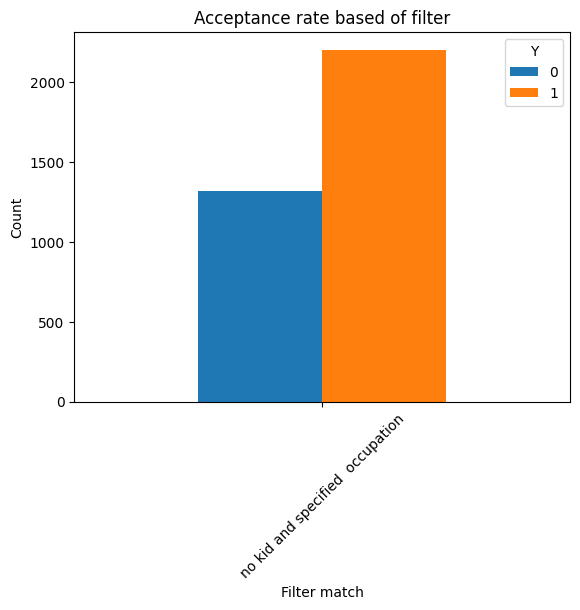

In [90]:

#Since Bar has some rows with Nan, removing those
bar_df_cleaned = dn_data

list1 = ['never', 'less1']
#list of ppl hwo went to bar more than once a month
df1 = bar_df_cleaned.query("`Bar` not in @list1")

'''
#print(bar_adf['passanger'].unique())
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
'''
'''
#print(bar_adf['occupation'].unique())
['Unemployed' 'Architecture & Engineering' 'Education&Training&Library'
 'Student' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Computer & Mathematical'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Life Physical Social Science'
 'Arts Design Entertainment Sports & Media'
 'Installation Maintenance & Repair' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Transportation & Material Moving' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']'''

exclude_occu_list = ['Farming Fishing & Forestry']
exclude_kid_list = ['Kid(s)']
df2 = df1.query("`occupation` not in @exclude_occu_list and `passanger` not in @exclude_kid_list")

df2 = df2['Y'].value_counts().reset_index()
df2['Matching'] = 'no kid and specified  occupation' 

df3 = df1.query("`occupation` in @exclude_occu_list and `passanger` in @exclude_kid_list")

df3 = df3['Y'].value_counts().reset_index()
df3['Matching'] = "kid and other occupation"

data = pd.concat([df2, df3], axis=0)

data.pivot_table(index = 'Matching', columns='Y').plot(kind='bar', y='count')
plt.title('Acceptance rate based of filter')
plt.xlabel('Filter match')
plt.ylabel('Count')
plt.xticks(rotation=45) 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



   Y  count                      Matching Filter
0  1   2205           >1, no kid and not widowed
1  0   1322           >1, no kid and not widowed
0  1   1349                  >1 and under age 30
1  0    791                  >1 and under age 30
0  1   1327  cheap restuarant with less than 50k
1  0    877  cheap restuarant with less than 50k


(array([0, 1, 2]),
 [Text(0, 0, '>1 and under age 30'),
  Text(1, 0, '>1, no kid and not widowed'),
  Text(2, 0, 'cheap restuarant with less than 50k')])

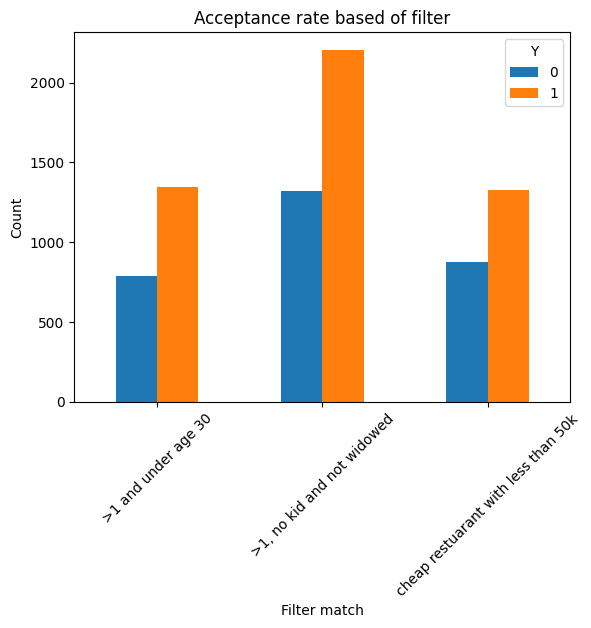

In [91]:

#Since Bar has some rows with Nan, removing those
bar_df_cleaned = dn_data

list1 = ['never', 'less1']
#list of ppl hwo went to bar more than once a month
df1 = bar_df_cleaned.query("`Bar` not in @list1")

#print(bar_adf['maritalStatus'].unique())
#['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

exclude_marital_list = ['Widowed']
exclude_kid_list = ['Kid(s)']

df2 = df1.query("`passanger` not in @exclude_kid_list and 'maritalstatus' not in @exclude_marital_list")
df2 = df2['Y'].value_counts().reset_index()
df2['Matching Filter'] = '>1, no kid and not widowed' 

#print(bar_df['age'].unique())
#['21' '46' '26' '31' '41' '50plus' '36' 'below21']a

list_age_30 = ['21', '26', 'below21']
df3 = df1.query("`age` in @list_age_30")

df3 = df3['Y'].value_counts().reset_index()
df3['Matching Filter'] = '>1 and under age 30' 


#list for frivers going more then once a month to acheap resturant
list = ['4~8', 'gt8']
df4 = bar_df_cleaned.query("`RestaurantLessThan20` in @list")

#print(bar_df['income'].unique())
#['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
# '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
# 'Less than $12500']

list_less_than_50k = ['$37500 - $49999','$12500 - $24999', '$25000 - $37499', 'Less than $12500']
df5 = df4.query("`income` in @list_less_than_50k")

df5 = df5['Y'].value_counts().reset_index()
df5['Matching Filter'] = 'cheap restuarant with less than 50k' 


data = pd.concat([df2, df3], axis=0)
data = pd.concat([data, df5], axis=0)

print(data)

data.pivot_table(index = 'Matching Filter', columns='Y').plot(kind='bar', y='count')
plt.title('Acceptance rate based of filter')
plt.xlabel('Filter match')
plt.ylabel('Count')
plt.xticks(rotation=45) 


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Observations

**Findings**

1. Drivers who has kid passnger dont go to bar
2. Age group doesnt matter a lot for folks in accpeting the bar coupon
3. Acceptance rate is more for frequent bar goers
4. Accpetance rate is more for drivers with no kids and are not widowed



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<Axes: title={'center': 'Non Accepted Coupon to gender distribution'}, xlabel='coupon'>

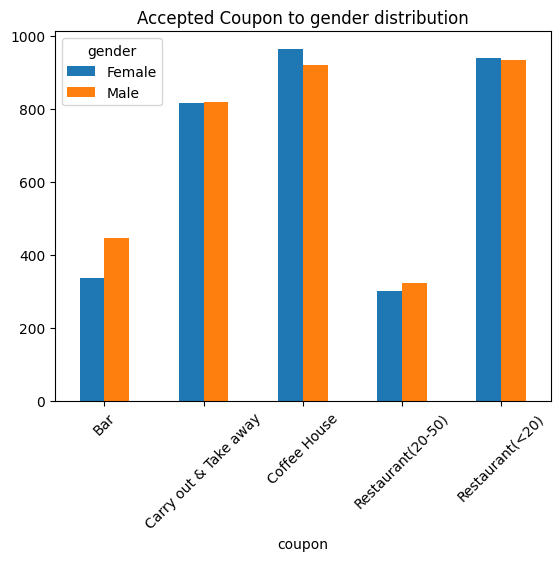

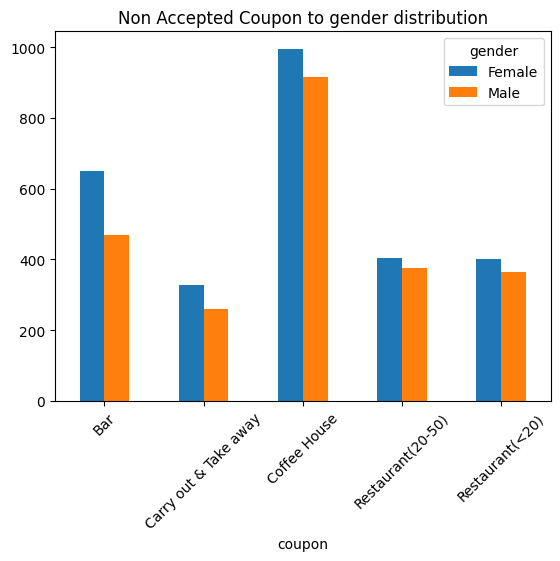

In [92]:
accepted_coupon = dn_data[dn_data['Y'] == 1]
not_accepted_coupon = dn_data[dn_data['Y'] == 0]
y = accepted_coupon.groupby('coupon').gender.value_counts().reset_index()

y.pivot_table(index = 'coupon', columns='gender').plot(kind='bar', y='count', title='Accepted Coupon to gender distribution', rot=45)

y = not_accepted_coupon.groupby('coupon').gender.value_counts().reset_index()
y.pivot_table(index = 'coupon', columns='gender').plot(kind='bar', y='count', title='Non Accepted Coupon to gender distribution', rot=45)


**Findings Above**

1. Cheaper resturant coupon is more accepted then any other coupon
2. Both gender have equal acceptance rate

        age  Y  count
0        21  1   1482
1        21  0   1023
2        26  1   1421
3        26  0    945
4        31  1   1051
5        31  0    855
6        36  1    674
7        36  0    577
8        41  1    609
9        41  0    452
10       46  1    372
11       46  0    276
12   50plus  1    872
13   50plus  0    853
14  below21  1    317
15  below21  0    185
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='age'>

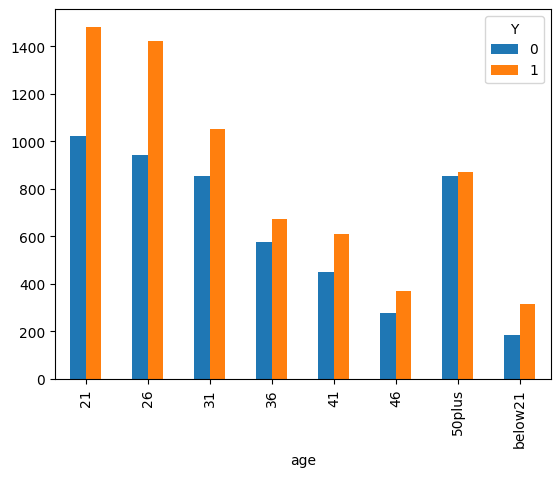

In [93]:
y = dn_data.groupby('age').Y.value_counts().reset_index()
print(y)
print(type(y))

y.pivot_table(index = 'age', columns='Y').plot(kind='bar', y='count')

**Findings Above**

1. Driver which has 21 or 26 has maximum accepatnce rate


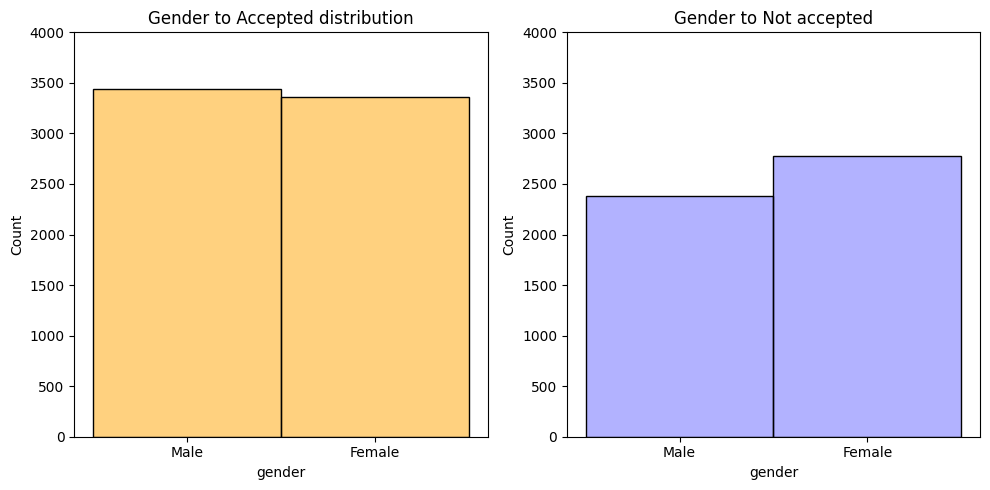

In [94]:
yes = dn_data.loc[dn_data['Y'] == 1]['gender']
no = dn_data.loc[dn_data['Y'] == 0]['gender']
#sns.histplot(yes, alpha=0.75, color = "mediumorchid", label='accepted', edgecolor='black', linewidth=0.1)
#sns.histplot(no, alpha=1, color = "lightskyblue", label="not accepted", edgecolor='white', linewidth=0.2)

#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(yes, color = 'orange', alpha = 0.5, label='accepted', ax=axes[0])
axes[0].set_title('Gender to Accepted distribution')
sns.histplot(no, color = 'blue',  alpha = 0.3, label="not accepted", ax=axes[1])
axes[1].set_title('Gender to Not accepted')
axes[0].set_ylim(0, 4000)
axes[1].set_ylim(0, 4000)
plt.tight_layout()

**Findings Above**

1. Gender is not a factor for the acceptance distribution.

   time  Y  count
0  10AM  1   1304
1  10AM  0    841
2  10PM  1    971
3  10PM  0    915
4   2PM  1   1262
5   2PM  0    649
6   6PM  1   1780
7   6PM  0   1276
8   7AM  0   1485
9   7AM  1   1481
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='time'>

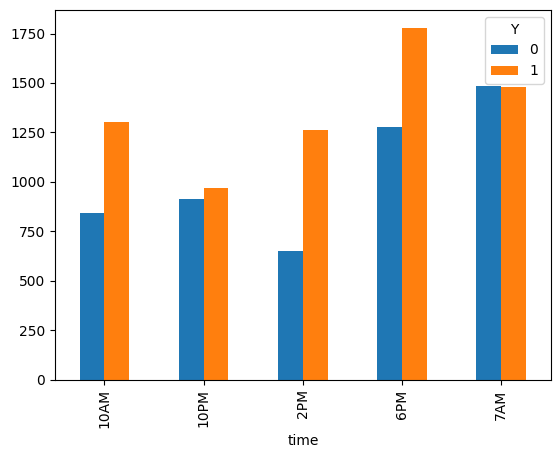

In [95]:

y = dn_data.groupby('time').Y.value_counts().reset_index()
print(y)
print(type(y))

y.pivot_table(index = 'time', columns='Y').plot(kind='bar', y='count')


**Findings Above**

1. Evenings are generally better for coupon acceptance

### General findings

1. Send most of the coupons towards evenining timing or just before evening.
2. Younger age drivers can be targetted more the coupons.